<a href="https://colab.research.google.com/github/AaravM11/NLP_Research/blob/main/TFIDF_Log_Criticism_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages, data loading

import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn import preprocessing

df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/chatgpt.csv")


df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.head()

,tweets,labels
0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,"Try talking with ChatGPT, our new AI system wh...",good
2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,"THRILLED to share that ChatGPT, our new model ...",good
4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
# clean the tweets

tweets = df["tweets"].values
cleaned_tweets = []

import re

for tweet in tweets:
  tweet2 = re.sub(r'^RT[\s]+', '', tweet)
  tweet2 = re.sub('http://\S+|https://\S+', '', tweet2)
  tweet2 = re.sub('http[s]?://\S+', '', tweet2)
  tweet2 = re.sub(r"http\S+", "", tweet2)
  tweet2 = re.sub(r'#', '', tweet2)
  cleaned_tweets.append(tweet2)

for i in range(len(tweets)):
  tweets[i] = cleaned_tweets[i]

original_tweets = tweets


In [ ]:
# initialize criticism phrases

criticism_phrases = [
    "Not convinced by",
    "Vulnerable to criticism",
    "Disapprove of",
    "Take a critical stance on",
    "Not impressed",
    "Meh",
    "Disappointed",
    "Not cool",
    "Not buying it",
    "Seriously?",
    "Not okay",
    "Kinda sketchy",
    "Raise an eyebrow",
    "Not feeling it",
    "Not a fan",
    "Eh, nope",
    "Bit of a letdown",
    "Questionable move",
    "Hmm, doubtful",
    "Skeptical about",
    "Lacking substance",
    "Seems off",
    "Could do better",
    "Expected more",
    "Unimpressive",
    "Flimsy excuse",
    "Not quite there",
    "Bit underwhelming",
    "Not sold on this",
    "Seems fishy",
    "Missed the mark",
    "Not vibing with",
    "Bit of a fail",
    "Didn't hit home",
    "However",
    "Unfortunately",
    "Flaw",
    "Issue",
    "Problematic",
    "Concerning",
    "Inadequate",
    "Lack",
    "Mistake",
    "Weakness",
    "Failure",
    "Shortcoming",
    "Not up to par",
    "Falls short",
    "Disappointing",
    "Unsatisfactory",
    "Fault",
    "Critique",
    "Condemn",
    "Object",
    "Dissatisfying",
    "Underwhelming",
    "Not well-executed",
    "Questionable",
    "Criticize",
    "Challenge",
    "Rebuke",
    "Negative aspect",
    "Drawback",
    "Debatable",
    "Criticism",
    "Censure",
    "Knock",
    "Denounce",
    "Faultfinding",
    "Reprove",
    "Upbraiding",
    "Reprimand",
    "Blame",
    "Reproach",
    "Chide",
    "Attack",
    "Nitpick",
    "Find fault with",
    "Take issue with",
    "Object to",
    "Complain about",
    "Berate",
    "Castigate",
    "Decry"
]

In [ ]:
# empty criticism labels array

criticism_labels = np.empty(df.shape[0], dtype=object)
criticism_labels


array([None, None, None, ..., None, None, None], dtype=object)

In [ ]:
# tokenizing all the samples

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

for i in range(len(tweets)):
  tweets[i] = word_tokenize(tweets[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(criticism_phrases[0])

Not convinced by


In [ ]:
# tokenizing all the of the criticism phrases

for i in range(len(criticism_phrases)):
  criticism_phrases[i] = word_tokenize(criticism_phrases[i])


criticism_phrases

[['Not', 'convinced', 'by'],
 ['Vulnerable', 'to', 'criticism'],
 ['Disapprove', 'of'],
 ['Take', 'a', 'critical', 'stance', 'on'],
 ['Not', 'impressed'],
 ['Meh'],
 ['Disappointed'],
 ['Not', 'cool'],
 ['Not', 'buying', 'it'],
 ['Seriously', '?'],
 ['Not', 'okay'],
 ['Kinda', 'sketchy'],
 ['Raise', 'an', 'eyebrow'],
 ['Not', 'feeling', 'it'],
 ['Not', 'a', 'fan'],
 ['Eh', ',', 'nope'],
 ['Bit', 'of', 'a', 'letdown'],
 ['Questionable', 'move'],
 ['Hmm', ',', 'doubtful'],
 ['Skeptical', 'about'],
 ['Lacking', 'substance'],
 ['Seems', 'off'],
 ['Could', 'do', 'better'],
 ['Expected', 'more'],
 ['Unimpressive'],
 ['Flimsy', 'excuse'],
 ['Not', 'quite', 'there'],
 ['Bit', 'underwhelming'],
 ['Not', 'sold', 'on', 'this'],
 ['Seems', 'fishy'],
 ['Missed', 'the', 'mark'],
 ['Not', 'vibing', 'with'],
 ['Bit', 'of', 'a', 'fail'],
 ['Did', "n't", 'hit', 'home'],
 ['However'],
 ['Unfortunately'],
 ['Flaw'],
 ['Issue'],
 ['Problematic'],
 ['Concerning'],
 ['Inadequate'],
 ['Lack'],
 ['Mistake'],
 

In [ ]:
# stemming criticism phrases

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_tweets = []
for tweet in criticism_phrases:
  stemmed_tweet = []
  for word in tweet:
    new_word = stemmer.stem(word)
    stemmed_tweet.append(new_word)
  stemmed_tweets.append(stemmed_tweet)

for i in range(len(criticism_phrases)):
  criticism_phrases[i] = stemmed_tweets[i]

In [ ]:
# stemming all the samples

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_tweets = []
for tweet in tweets:
  stemmed_tweet = []
  for word in tweet:
    new_word = stemmer.stem(word)
    stemmed_tweet.append(new_word)
  stemmed_tweets.append(stemmed_tweet)

for i in range(len(tweets)):
  tweets[i] = stemmed_tweets[i]

In [ ]:
print(tweets)
print(criticism_phrases)

[list(['chatgpt', ':', 'optim', 'languag', 'model', 'for', 'dialogu', '@', 'openai'])
 list(['tri', 'talk', 'with', 'chatgpt', ',', 'our', 'new', 'ai', 'system', 'which', 'is', 'optim', 'for', 'dialogu', '.', 'your', 'feedback', 'will', 'help', 'us', 'improv', 'it', '.'])
 list(['chatgpt', ':', 'optim', 'languag', 'model', 'for', 'dialogu', 'ai', 'machinelearn', 'datasci', 'artificialintelligence\\n\\ntrend', 'ai/ml', 'articl', 'identifi', '&', 'amp', ';', 'digest', 'via', 'granola', ';', 'a', 'machine-driven', 'rss', 'bot', 'by', 'ramsey', 'elbash'])
 ...
 list(['chatgpt', 'is', 'be', 'disassembl', 'until', 'it', 'can', 'onli', 'dissembl'])
 list(['2023', 'predict', 'by', 'chatgpt', '.', 'noth', 'realli', 'specif', ',', 'just', 'some', 'trend', 'from', 'the', 'past', 'year', '.', '\\nshould', 'be', 'around', 'thi', 'topic', ',', 'we', 'will', 'see', 'in', '364', 'day', '🎉'])
 list(['from', 'chatgpt', ',', 'neat', 'stuff'])]
[['not', 'convinc', 'by'], ['vulner', 'to', 'critic'], ['disa

In [ ]:
# detokenizing all the samples

from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenizer = TreebankWordDetokenizer()

for i in range(len(tweets)):
  tweets[i] = detokenizer.detokenize(tweets[i])

In [ ]:
# detokenizing all the criticism phrases

for i in range(len(criticism_phrases)):
  criticism_phrases[i] = detokenizer.detokenize(criticism_phrases[i])

In [ ]:
print(tweets)
print(criticism_phrases)

['chatgpt: optim languag model for dialogu @ openai'
 'tri talk with chatgpt, our new ai system which is optim for dialogu . your feedback will help us improv it.'
 'chatgpt: optim languag model for dialogu ai machinelearn datasci artificialintelligence\\n\\ntrend ai/ml articl identifi & amp; digest via granola; a machine-driven rss bot by ramsey elbash'
 ... 'chatgpt is be disassembl until it can onli dissembl'
 '2023 predict by chatgpt . noth realli specif, just some trend from the past year . \\nshould be around thi topic, we will see in 364 day 🎉'
 'from chatgpt, neat stuff']
['not convinc by', 'vulner to critic', 'disapprov of', 'take a critic stanc on', 'not impress', 'meh', 'disappoint', 'not cool', 'not buy it', 'serious?', 'not okay', 'kinda sketchi', 'rais an eyebrow', 'not feel it', 'not a fan', 'eh, nope', 'bit of a letdown', 'question move', 'hmm, doubt', 'skeptic about', 'lack substanc', 'seem off', 'could do better', 'expect more', 'unimpress', 'flimsi excus', 'not quit 

In [ ]:
# initializing criticism array labels

new_criticism_labels = []

for i in range(len(criticism_labels)):
    found = False

    for phrase in criticism_phrases:
        if phrase in tweets[i]:
            new_criticism_labels.append(1)
            found = True
            break

    if not found:
        new_criticism_labels.append(0)
criticism_labels = new_criticism_labels

print(len(criticism_labels))

219294


In [ ]:
print(len(criticism_labels))

219294


[link text](`https://`)

In [ ]:
tweets = original_tweets

In [ ]:
# tokenizing all the samples

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

for i in range(len(tweets)):
  tweets[i] = word_tokenize(tweets[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# importing stopwords

nltk.download("stopwords")
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# removing stop words

stop = set(stopwords.words('english'))
print(stop)
new_tweets = tweets
new_tweets2 = []
for tweet in new_tweets:
  new_tweet = []
  for word in tweet:
    if (word not in stop and word not in string.punctuation):
      new_tweet.append(word)
  new_tweets2.append(new_tweet)


for i in range(len(tweets)):
  tweets[i] = new_tweets2[i]


{'over', 'doesn', 'she', "couldn't", 'my', 'what', 'wasn', 'the', 'he', 'between', "mustn't", 've', 'from', 'ma', 'yourself', 'herself', 'o', 'had', 'when', 'both', 'same', "didn't", 'them', 'were', 'but', 'needn', "weren't", 'myself', "aren't", 'mightn', 'they', "she's", 'do', 'm', 'other', 'did', 'at', 'isn', 'below', 'few', 'for', 'to', "should've", 'or', 'y', 'wouldn', 'that', 'with', 'aren', 'me', 'until', 'under', 'is', 'why', 'its', 's', 'any', 'mustn', 'our', 'ours', 'her', 'nor', 'be', 'don', 'here', 'whom', 'just', 'how', 'his', 'being', 'during', 'as', 'won', 'no', 'while', 'doing', 'those', 'himself', 'than', 'if', 'a', 'some', 'more', 'am', 'having', 'there', 'such', "you'd", 'once', 'you', 'does', "wouldn't", 'after', 'where', "shan't", 'it', 'been', 'haven', "you're", 'was', 'through', 'their', 'because', 'd', 'has', "haven't", 'weren', 'theirs', 'each', 'about', 'in', 'then', 'itself', "you've", 'i', "it's", 'which', 'll', 'him', 'are', 'will', 'we', 'have', 'ain', 'now

In [ ]:
# stemming all the samples

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_tweets = []
for tweet in tweets:
  stemmed_tweet = []
  for word in tweet:
    new_word = stemmer.stem(word)
    stemmed_tweet.append(new_word)
  stemmed_tweets.append(stemmed_tweet)

for i in range(len(tweets)):
  tweets[i] = stemmed_tweets[i]

In [ ]:
print(tweets)

[list(['chatgpt', 'optim', 'languag', 'model', 'dialogu', 'openai'])
 list(['tri', 'talk', 'chatgpt', 'new', 'ai', 'system', 'optim', 'dialogu', 'feedback', 'help', 'us', 'improv'])
 list(['chatgpt', 'optim', 'languag', 'model', 'dialogu', 'ai', 'machinelearn', 'datasci', 'artificialintelligence\\n\\ntrend', 'ai/ml', 'articl', 'identifi', 'amp', 'digest', 'via', 'granola', 'machine-driven', 'rss', 'bot', 'ramsey', 'elbash'])
 ... list(['chatgpt', 'disassembl', 'onli', 'dissembl'])
 list(['2023', 'predict', 'chatgpt', 'noth', 'realli', 'specif', 'trend', 'past', 'year', '\\nshould', 'around', 'thi', 'topic', 'see', '364', 'day', '🎉'])
 list(['chatgpt', 'neat', 'stuff'])]


In [ ]:
y = criticism_labels
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
tweets = np.array(tweets)

In [ ]:
type(tweets)

numpy.ndarray

In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

detokenizer = TreebankWordDetokenizer()

for i in range(len(tweets)):
  tweets[i] = detokenizer.detokenize(tweets[i])

In [ ]:
# Import CountVectorizer class.
# CountVectorizer converts text data to matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

# fit_transform() creates dictionary and return term-document matrix.
X_counts = count_vector.fit_transform(tweets)

# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_tfidf,y,test_size = .25, random_state = 4)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train = y_train.ravel()
y_val = y_val.ravel()

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = logreg.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [ ]:
print(classification_report(y_val, y_pred))
#TFIDF with logistic regression

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50819
           1       0.83      1.00      0.91      4005

    accuracy                           0.99     54824
   macro avg       0.92      0.99      0.95     54824
weighted avg       0.99      0.99      0.99     54824



In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))



[[50006     1]
 [  813  4004]]


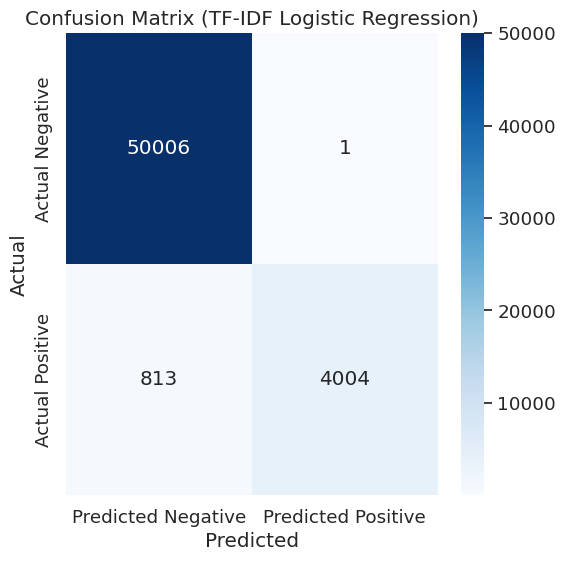

In [ ]:
conf_matrix = confusion_matrix(y_val, y_pred)

# Set up the figure and axes
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (TF-IDF Logistic Regression)")

plt.show()